# Universal Bank Data Load and Data Prep

## 1.0 Import and install python libraries

In [1]:
# import numpy and pandas libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


## 2.0 Set Random Seed

In [2]:
# set random seed to ensure that results are repeatable
np.random.seed(1)

## 3.0 Load data 

In [3]:
# load data
UniversalBank = pd.read_csv("C:/Users/suman/DspData/data/UniversalBank.csv")

## 4.0 Conduct initial exploration of the data

In [4]:
# look at the data
UniversalBank.head(3) # note that we don't want to dump all the data to the screen

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0


In [5]:
# generate a basic summary of the data
UniversalBank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
# generate a statistical summary of the numeric value in the data
UniversalBank.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [7]:
# Check the missing values by summing the total na's for each variable
UniversalBank.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [8]:
# create a list of these catagorical variables
category_var_list = list(UniversalBank.select_dtypes(include='object').columns)
category_var_list


#  We need to drop ZIP, ID
UniversalBank.drop(['ZIP Code', 'ID'], axis=1, inplace = True) 

In [9]:
# explore the categorical variable values - often there are typos here that need to be fixed.
for cat in category_var_list: # generally, we want to avoid for loops and use a functional style (i.e. list comprehension)
    print(f"Category: {cat} Values: {UniversalBank[cat].unique()}")

## 5.0 Process the data

* Conduct any data prepartion that should be done *BEFORE* the data split.
* Split the data.
* Conduct any data preparation that should be done *AFTER* the data split.

In [10]:
# split the data into validation and training set
train_df, test_df = train_test_split(UniversalBank, test_size=0.3)

# to reduce repetition in later code, create variables to represent the columns
# that are our predictors and target
target = 'Securities Account'
predictors = list(UniversalBank.columns)
predictors.remove(target)

## 6.0 Save the data

In [11]:
train_X = train_df[predictors]
train_y = train_df[target] # train_target is now a series objecttrain_df.to_csv('airbnb_train_df.csv', index=False)
test_X = test_df[predictors]
test_y = test_df[target] # validation_target is now a series object

train_df.to_csv('UniversalBank_train_df.csv', index=False)
train_X.to_csv('UniversalBank_train_X.csv', index=False)
train_y.to_csv('UniversalBank_train_y.csv', index=False)
test_df.to_csv('UniversalBank_test_df.csv', index=False)
test_X.to_csv('UniversalBank_test_X.csv', index=False)
test_y.to_csv('UniversalBank_test_y.csv', index=False)

## 7.0 Load data
Load data (it's already cleaned and preprocessed)


In [12]:
X_train = pd.read_csv('C:/Users/suman/DspData/Week 4 decision tree/UniversalBank_train_X.csv') 
y_train = pd.read_csv('C:/Users/suman/DspData/Week 4 decision tree/UniversalBank_train_y.csv') 
X_test = pd.read_csv('C:/Users/suman/DspData/Week 4 decision tree/UniversalBank_test_X.csv') 
y_test = pd.read_csv('C:/Users/suman/DspData/Week 4 decision tree/UniversalBank_test_y.csv') 

## 8.0 Model the data

In [13]:
performance = pd.DataFrame({"model": [], "Accuracy": [], "Precision": [], "Recall": [], "F1": []})

In [14]:
log_reg_model = LogisticRegression(max_iter=500, penalty= 'none')
_ = log_reg_model.fit(X_train, np.ravel(y_train))

c:\Users\suman\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
model_preds = log_reg_model.predict(X_test)
c_matrix = confusion_matrix(y_test, model_preds)
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
print (TP,TN,FP,FN)

performance = pd.concat([performance, pd.DataFrame({'model':"default logistic", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                     'Precision': [TP/(TP+FP)],
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                     }, index=[0])])
performance

32 1319 25 124


,model,Accuracy,Precision,Recall,F1
0,default logistic,0.900667,0.561404,0.205128,0.300469


### linear logistic


In [16]:
log_reg_liblin_model = LogisticRegression(solver='liblinear').fit(X_train, np.ravel(y_train))

model_preds = log_reg_liblin_model.predict(X_test)
c_matrix = confusion_matrix(y_test, model_preds)
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance = pd.concat([performance, pd.DataFrame({'model':"liblinear logistic", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                     }, index=[0])])
performance

,model,Accuracy,Precision,Recall,F1
0,default logistic,0.900667,0.561404,0.205128,0.300469
0,liblinear logistic,0.902667,0.592593,0.205128,0.304762


### 3.1 Fit a SVM classification model using linear kernal


In [31]:
from sklearn.svm import SVC
svm_lin_model = SVC(kernel="linear")
_ = svm_lin_model.fit(X_train, np.ravel(y_train))
model_preds = svm_lin_model.predict(X_test)
c_matrix = confusion_matrix(y_test, model_preds)
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance= pd.concat([performance, pd.DataFrame({'model':"linear svm", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                     }, index=[0])])


### 3.2 Fit a SVM classification model using rbf kernal


In [33]:
svm_rbf_model = SVC(kernel="rbf", C=10, gamma='scale')
_ = svm_rbf_model.fit(X_train, np.ravel(y_train))

model_preds = svm_rbf_model.predict(X_test)
c_matrix = confusion_matrix(y_test, model_preds)
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
print(TP,FP,TN,FN)
performance= pd.concat([performance, pd.DataFrame({'model':"rbf svm", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                     }, index=[0])])


0 0 1344 156


C:\Users\suman\AppData\Local\Temp\ipykernel_4160\799470897.py:13: RuntimeWarning: invalid value encountered in longlong_scalars
  'Precision': [TP/(TP+FP)],


### 3.3 Fit a SVM classification model using polynomial kernal

In [34]:
svm_poly_model = SVC(kernel="poly", degree=3, coef0=1, C=10)
_ = svm_poly_model.fit(X_train, np.ravel(y_train))

In [35]:
model_preds = svm_poly_model.predict(X_test)
c_matrix = confusion_matrix(y_test, model_preds)
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance= pd.concat([performance, pd.DataFrame({'model':"poly svm", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                     }, index=[0])])

C:\Users\suman\AppData\Local\Temp\ipykernel_4160\3046807544.py:9: RuntimeWarning: invalid value encountered in longlong_scalars
  'Precision': [TP/(TP+FP)],


In [36]:

performance.sort_values(by=['Precision'],ascending= False)

,model,Accuracy,Precision,Recall,F1
0,liblinear logistic,0.902667,0.592593,0.205128,0.304762
0,default logistic,0.900667,0.561404,0.205128,0.300469
0,linear svm,0.897333,0.521739,0.153846,0.237624
0,rbf svm,0.896000,NaN,0.000000,0.000000
0,poly svm,0.896000,NaN,0.000000,0.000000
0,rbf svm,0.896000,NaN,0.000000,0.000000
0,rbf svm,0.896000,NaN,0.000000,0.000000
0,poly svm,0.896000,NaN,0.000000,0.000000


### Results
From the results above we can see that poly SVM has the highest precision

Conduct an initial random search across a wide range of possible parameters.

In [22]:
score_measure = "precision"
kfolds = 5

param_grid = {
    'min_samples_split': np.arange(1,100),  
    'min_samples_leaf': np.arange(1,100),
    'min_impurity_decrease': np.arange(0.0001, 0.01, 0.0005),
    'max_leaf_nodes': np.arange(5, 100), 
    'max_depth': np.arange(1,50), 
    'criterion': ['entropy', 'gini'],
}


In [24]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
rand_search = RandomizedSearchCV(estimator = dtree, param_distributions=param_grid, cv=kfolds, n_iter=300,
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)


In [25]:

_ = rand_search.fit(X_train, y_train)

print(f"The best {score_measure} score is {rand_search.best_score_}")
print(f"... with parameters: {rand_search.best_params_}")

bestRecallTree = rand_search.best_estimator_

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
The best precision score is 0.6532603006287216
... with parameters: {'min_samples_split': 80, 'min_samples_leaf': 15, 'min_impurity_decrease': 0.0011, 'max_leaf_nodes': 19, 'max_depth': 30, 'criterion': 'entropy'}


c:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\suman\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "c:\Users\suman\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 250, in fit
    raise ValueError(
ValueError: min_samples_split must be an integer greater than 1 or a float in (

In [26]:
c_matrix = confusion_matrix(y_test, rand_search.predict(X_test))
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
print(f"Accuracy={(TP+TN)/(TP+TN+FP+FN):.7f} Precision={TP/(TP+FP):.7f} Recall={TP/(TP+FN):.7f} F1={2*TP/(2*TP+FP+FN):.7f}")

Accuracy=0.9026667 Precision=0.5892857 Recall=0.2115385 F1=0.3113208


### Based on above resulted values we change our new parameters for our gridsearch

In [27]:
score_measure = "precision"
kfolds = 5

param_grid = {
    'min_samples_split': np.arange(40,44),  
    'min_samples_leaf': np.arange(10,16),
    'min_impurity_decrease': np.arange(0.0001, 0.001,0.0005),
    'max_leaf_nodes': np.arange(60,70), 
    'max_depth': np.arange(15,20), 
    'criterion': ['entropy'],
}

dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid=param_grid, cv=kfolds, 
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = grid_search.fit(X_train, y_train)

print(f"The best {score_measure} score is {grid_search.best_score_}")
print(f"... with parameters: {grid_search.best_params_}")

bestRecallTree = grid_search.best_estimator_

Fitting 5 folds for each of 2400 candidates, totalling 12000 fits
The best precision score is 0.6837458193979933
... with parameters: {'criterion': 'entropy', 'max_depth': 15, 'max_leaf_nodes': 60, 'min_impurity_decrease': 0.0001, 'min_samples_leaf': 10, 'min_samples_split': 41}


In [28]:
c_matrix = confusion_matrix(y_test, grid_search.predict(X_test))
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
print(f"Accuracy={(TP+TN)/(TP+TN+FP+FN):.7f} Precision={TP/(TP+FP):.7f} Recall={TP/(TP+FN):.7f} F1={2*TP/(2*TP+FP+FN):.7f}")

Accuracy=0.9013333 Precision=0.6428571 Recall=0.1153846 F1=0.1956522


## 5.0 Importance of features

In [29]:
np.round(grid_search.best_estimator_.feature_importances_,2)

array([0.05, 0.06, 0.13, 0.01, 0.08, 0.01, 0.09, 0.05, 0.34, 0.09, 0.08])

## 6.0 Diagrams of DTrees

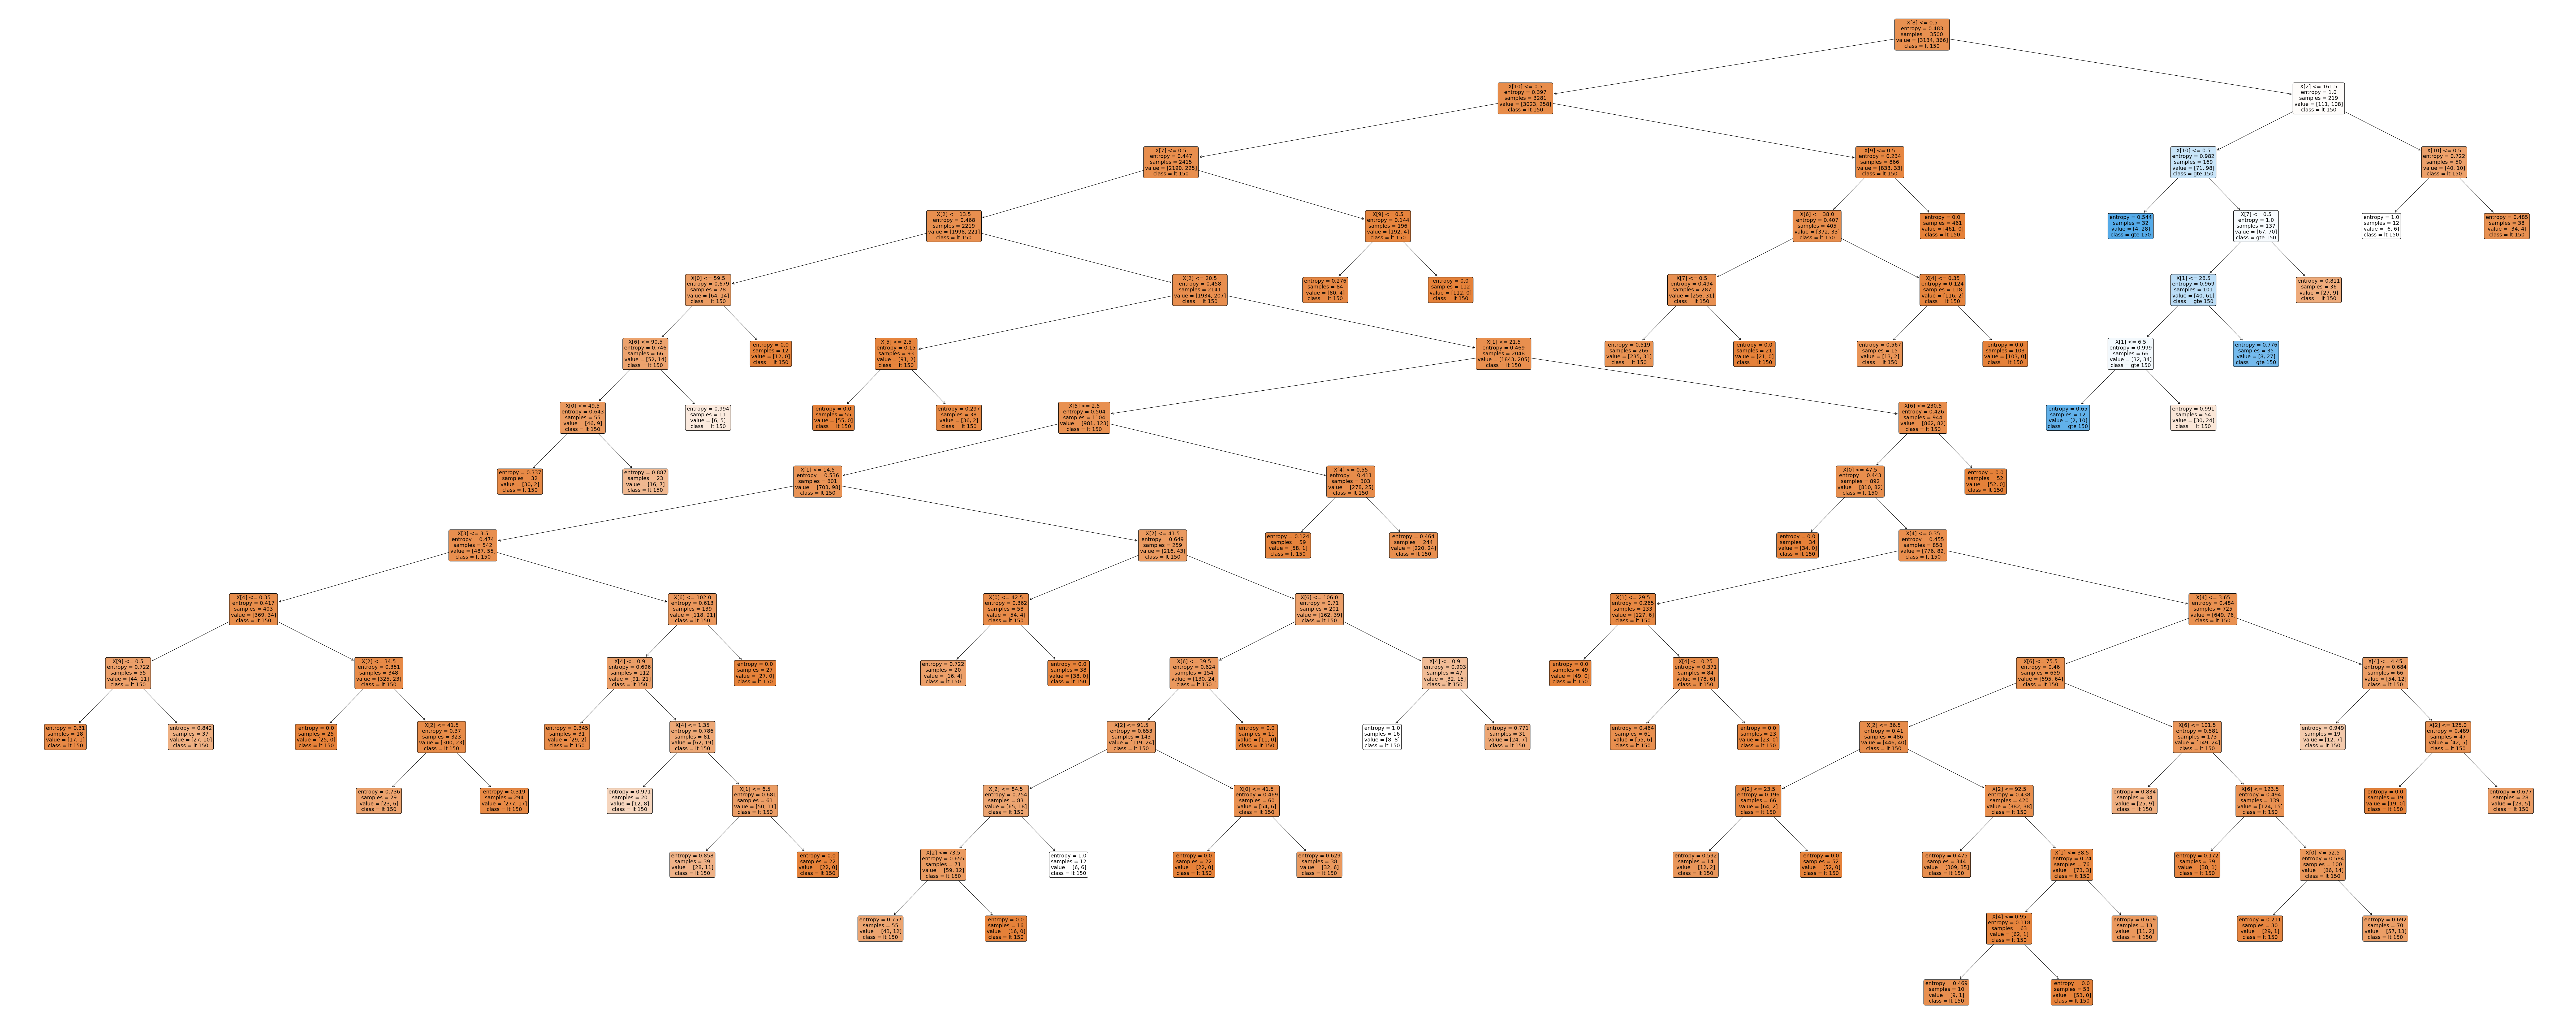

In [30]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(125,50))
tree = plot_tree(grid_search.best_estimator_, 
              #feature_names=train_inputs.columns.values, # our feature names are stripped from the data set
              class_names=['lt 150', 'gte 150'], 
              filled=True, 
              rounded=True, 
              fontsize=14)

#### According to our findings, our decision tree model performed better for the data, which helps the bank sell new securities to their current clients and increases the accuracy of their sales.